**Overfitting happens in all machine learning. There has always been a tension between optimization and generalization**.
## Optimization - 

```
it is the process of adjusting the hyperparameters (# of epochs, # of layers, activation functions etc. ) to get the best performance on the training data
```
## Generalization-


```
how well the well optimized/trained model performs on the unseen/new/test data.
```
So, Overfitting is basically when the model starts to learn new parameters on the training data but are mis-leading or irrelevant when it comes to new data

## Regularization-


```
so,to avoid overfitting of the data we use regularization which means we modulate the quantity of information that our mode is allowed to store or adding constraints on what informtion is allowed to be stored. That means if the network is allowed to only store a small number of patterns , the optimization process will force it focus only on those patterns which have a better chance of generalizing well. 
```




## Reducing the size of the network


```
the simplest way to avoid overfitting is to reduce the siz of the model.
Size of the model means the number of learnable parameters in the model ( # of layers and # of units in the layer), which refers to the models capacity.
So, a model with more learnable parameters has more memorization capacity.

By reducing the number of learnable parameters, the model won't be able to learn things easily so, it would resort to learnig compressed representations that have predictive power regarding the targets. But at the same time we have to keep in mind that not having enough learnable parameters might result in underfitting So, a good idea would be understand **too much capacity** and **not enough capacity**.

So, the strategy would be to try an array of network architectures on your validation data in order to find the correct size for your model. And the general workflow would be start with a relatively few layers and parameters and increase the size of layers or add new layers untill you see signs of diminishing returns wrt validation loss.
```



**Movie review classification and using reguarization**

**Loading and preparing the data**

In [1]:
from keras.datasets import imdb
(train_data, train_label), (test_data, test_label) = imdb.load_data(num_words=10000)

Using TensorFlow backend.


**Preparing the data**

In [0]:
import numpy as np
def vectorize_sequences(Sequences, dim=10000):
  results = np.zeros((len(Sequences),dim))
  for i, sequence in enumerate(Sequences):
    results[i, sequence] = 1.0
  return results

In [0]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [0]:
# vectorizing labels
y_train = np.asarray(train_label).astype('float32')
y_test = np.asarray(test_label).astype('float32')


building models for comparision of **small , big and original models** for regularization purposes

In [0]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [0]:
from keras import models
from keras import layers

def build_model_original():
  model = models.Sequential()
  model.add(layers.Dense(16,
                        activation = 'relu',
                        input_shape = (x_train.shape[1],)))
  model.add(layers.Dense(16,
                        activation = 'relu'))
  model.add(layers.Dense(1,
                        activation = 'sigmoid'))
  
  #compilation
  model.compile(optimizer = 'rmsprop',
               loss = 'binary_crossentropy',
               metrics = ['accuracy'])
  history_org = model.fit(partial_x_train,
                         partial_y_train,
                         epochs = 20,
                         batch_size = 512,
                         validation_data = (x_val,y_val))
  return history_org

In [0]:
from keras import models
from keras import layers

def build_model_small():
  model = models.Sequential()
  model.add(layers.Dense(4,
                        activation = 'relu',
                        input_shape = (x_train.shape[1],)))
  model.add(layers.Dense(4,
                        activation = 'relu'))
  model.add(layers.Dense(1,
                        activation = 'sigmoid'))
  
   #compilation
  model.compile(optimizer = 'rmsprop',
               loss = 'binary_crossentropy',
               metrics = ['accuracy'])
  
  history_sml = model.fit(partial_x_train,
                         partial_y_train,
                         epochs = 20,
                         batch_size = 512,
                         validation_data = (x_val,y_val))
  return history_sml

In [0]:
from keras import models
from keras import layers

def build_model_big():
  model = models.Sequential()
  model.add(layers.Dense(512,
                        activation = 'relu',
                        input_shape = (x_train.shape[1],)))
  model.add(layers.Dense(512,
                        activation = 'relu'))
  model.add(layers.Dense(1,
                        activation = 'sigmoid'))
  
   #compilation
  model.compile(optimizer = 'rmsprop',
               loss = 'binary_crossentropy',
               metrics = ['accuracy'])
  
  history_bg = model.fit(partial_x_train,
                         partial_y_train,
                         epochs = 20,
                         batch_size = 512,
                         validation_data = (x_val,y_val))
  return history_bg

Setting apart the **validation** set

In [9]:
hist_og = build_model_original()





Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 155us/step - loss: 0.5084 - acc: 0.7813 - val_loss: 0.3797 - val_acc: 0.8684
Epoch 2/20
15000/15000 [==============================] - 1s 94us/step - loss: 0.3004 - acc: 0.9047 - val_loss: 0.3004 - val_acc: 0.8897
Epoch 3/20
15000/15000 [==============================] - 1s 93us/step - loss: 0.2179 - acc: 0.9285 - val_loss: 0.3085 - val_acc: 0.8711
Epoch 4/20
15000/15000 [==============================] - 1s 93us/step - loss: 0.1750 - acc: 0.9437 - val_loss: 0.2840 - val_acc: 0.8832
Epoch 5/20
15000/15000 [==============================] - 1s 93us/step - loss: 0.1427 - acc: 0.9543 - val_loss: 0.2841 - val_acc: 0.8872
Epoch 6/20
15000/15000 [==============================] - 1s 93us/step - loss: 0.1150 - acc: 0.9650 - val_loss: 0.3166 - val_acc: 0.8772
Epoch 7

In [10]:
hist_bg = build_model_big()

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 150us/step - loss: 0.5578 - acc: 0.7638 - val_loss: 0.3356 - val_acc: 0.8661
Epoch 2/20
15000/15000 [==============================] - 2s 123us/step - loss: 0.2544 - acc: 0.9016 - val_loss: 0.2807 - val_acc: 0.8848
Epoch 3/20
15000/15000 [==============================] - 2s 124us/step - loss: 0.1431 - acc: 0.9465 - val_loss: 0.3131 - val_acc: 0.8878
Epoch 4/20
15000/15000 [==============================] - 2s 125us/step - loss: 0.0753 - acc: 0.9732 - val_loss: 0.3704 - val_acc: 0.8814
Epoch 5/20
15000/15000 [==============================] - 2s 124us/step - loss: 0.1074 - acc: 0.9757 - val_loss: 0.2929 - val_acc: 0.8852
Epoch 6/20
15000/15000 [==============================] - 2s 124us/step - loss: 0.0069 - acc: 0.9999 - val_loss: 0.4852 - val_acc: 0.8859
Epoch 7/20
15000/15000 [==============================] - 2s 124us/step - loss: 5.7790e-04 - acc: 1.0000 - val_loss: 0.571

In [11]:
hist_sm = build_model_small()

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 117us/step - loss: 0.5819 - acc: 0.7896 - val_loss: 0.4990 - val_acc: 0.8500
Epoch 2/20
15000/15000 [==============================] - 1s 99us/step - loss: 0.4336 - acc: 0.8813 - val_loss: 0.4110 - val_acc: 0.8653
Epoch 3/20
15000/15000 [==============================] - 1s 99us/step - loss: 0.3485 - acc: 0.9008 - val_loss: 0.3568 - val_acc: 0.8789
Epoch 4/20
15000/15000 [==============================] - 1s 99us/step - loss: 0.2898 - acc: 0.9157 - val_loss: 0.3207 - val_acc: 0.8848
Epoch 5/20
15000/15000 [==============================] - 1s 100us/step - loss: 0.2470 - acc: 0.9271 - val_loss: 0.2979 - val_acc: 0.8896
Epoch 6/20
15000/15000 [==============================] - 1s 100us/step - loss: 0.2147 - acc: 0.9351 - val_loss: 0.2853 - val_acc: 0.8899
Epoch 7/20
15000/15000 [==============================] - 1s 100us/step - loss: 0.1897 - acc: 0.9438 - val_loss: 0.2778 - val

In [0]:
hist_bg_dict = hist_bg.history
hist_sm_dict = hist_sm.history
hist_og_dict = hist_og.history

In [13]:
len(hist_og_dict["val_loss"])

20

**now we want to plot the validatio losses ( vall_loss) for the 3 cases**

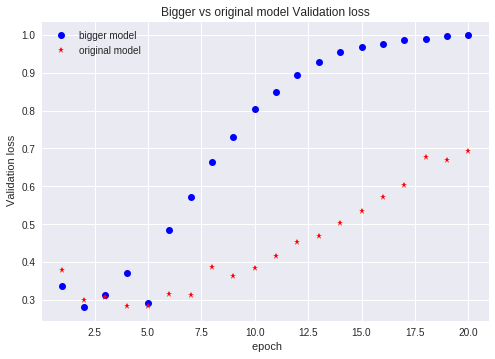

In [14]:
# original and bigger model
import matplotlib.pyplot as plt
hist_bg_dict_val_loss = hist_bg_dict["val_loss"]
hist_og_dict_val_loss = hist_og_dict["val_loss"]

epochs = range(1,len(hist_bg_dict_val_loss) + 1)

plt.plot(epochs, hist_bg_dict_val_loss,"bo", label= 'bigger model')
plt.plot(epochs, hist_og_dict_val_loss, "r*", label= 'original model')
plt.title("Bigger vs original model Validation loss")
plt.ylabel(" Validation loss")
plt.xlabel(" epoch")
plt.legend()
plt.show()

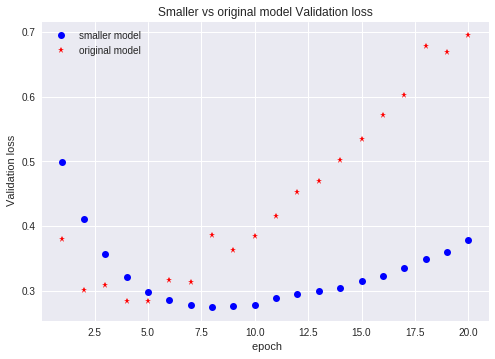

In [15]:
# original and small model
import matplotlib.pyplot as plt
hist_sm_dict_val_loss = hist_sm_dict["val_loss"]
hist_og_dict_val_loss = hist_og_dict["val_loss"]

epochs = range(1,len(hist_sm_dict_val_loss) + 1)

plt.plot(epochs, hist_sm_dict_val_loss,"bo", label= 'smaller model')
plt.plot(epochs, hist_og_dict_val_loss, "r*", label= 'original model')
plt.title("Smaller vs original model Validation loss")
plt.ylabel(" Validation loss")
plt.xlabel(" epoch")
plt.legend()
plt.show()

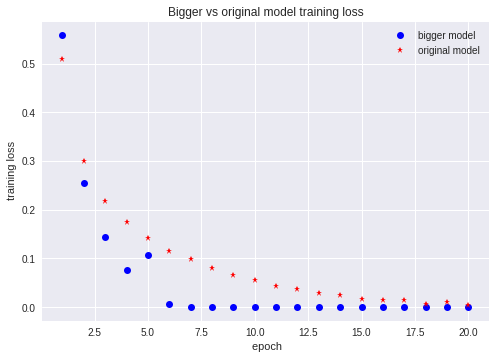

In [16]:
# original and bigger model
import matplotlib.pyplot as plt
hist_bg_dict_train_loss = hist_bg_dict["loss"]
hist_og_dict_train_loss = hist_og_dict["loss"]

epochs = range(1,len(hist_bg_dict_train_loss) + 1)

plt.plot(epochs, hist_bg_dict_train_loss,"bo", label= 'bigger model')
plt.plot(epochs, hist_og_dict_train_loss, "r*", label= 'original model')
plt.title("Bigger vs original model training loss")
plt.ylabel(" training loss")
plt.xlabel(" epoch")
plt.legend()
plt.show()

**Adding Weight regularization**



```
**Given two explanations for something the one most likely to be correct is the simplest one-i.e. the one with fewer assumptions**
The same concept goes for models learned by neural networks i.e. a simple network,
```


```
A Simple model in the above context is the one in which the distribution of parameter values has less entropy (a model with fewer parameters).
So, a common way to mitigate overfitting is by reducing the complexity of the network by forcing its weights to take only small values, which make the distribution of parameter values(weights) more regular.
```


**Weight Regularization**


```
It is done by adding to the loss fucntion the cost associated with having large weights

1. L1 regularization: cost added is proportional to the *absolute value of the weight coefficients*
2. L2 regularization: cost added is proportional to the square of the value of the weight coefficients.
```


**Adding L2 weight normalization to the model**

In [0]:
from keras import layers
from keras import models
from keras import regularizers
def build_model_regularized():
  model = models.Sequential()
  model.add(layers.Dense(16,
                        activation= 'relu',
                        kernel_regularizer = regularizers.l2(0.001), #l2(0.001 means that each weight coefficent adds to the loss a value, 
                        input_shape = (x_train.shape[1],)))                 #equal to 0.001 * weight_coefficient_value)
  model.add(layers.Dense(16,
                        kernel_regularizer=regularizers.l2(0.001),
                        activation = 'relu',
                        ))
  model.add(layers.Dense(1, activation='sigmoid'))
  
   #compilation
  model.compile(optimizer = 'rmsprop',
               loss = 'binary_crossentropy',
               metrics = ['accuracy'])
  
  history_rgu = model.fit(partial_x_train,
                         partial_y_train,
                         epochs = 20,
                         batch_size = 512,
                         validation_data = (x_val,y_val))
  return history_rgu

In [18]:
hist_rgu = build_model_regularized()

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 120us/step - loss: 0.5700 - acc: 0.7876 - val_loss: 0.4846 - val_acc: 0.8243
Epoch 2/20
15000/15000 [==============================] - 1s 95us/step - loss: 0.3755 - acc: 0.8954 - val_loss: 0.3678 - val_acc: 0.8756
Epoch 3/20
15000/15000 [==============================] - 1s 95us/step - loss: 0.2948 - acc: 0.9184 - val_loss: 0.3354 - val_acc: 0.8882
Epoch 4/20
15000/15000 [==============================] - 1s 94us/step - loss: 0.2553 - acc: 0.9304 - val_loss: 0.3374 - val_acc: 0.8826
Epoch 5/20
15000/15000 [==============================] - 1s 94us/step - loss: 0.2337 - acc: 0.9399 - val_loss: 0.3418 - val_acc: 0.8823
Epoch 6/20
15000/15000 [==============================] - 1s 95us/step - loss: 0.2180 - acc: 0.9466 - val_loss: 0.3330 - val_acc: 0.8848
Epoch 7/20
15000/15000 [==============================] - 1s 94us/step - loss: 0.2031 - acc: 0.9526 - val_loss: 0.3396 - val_ac

In [0]:
hist_rg_dict = hist_rgu.history

In [20]:
hist_rg_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

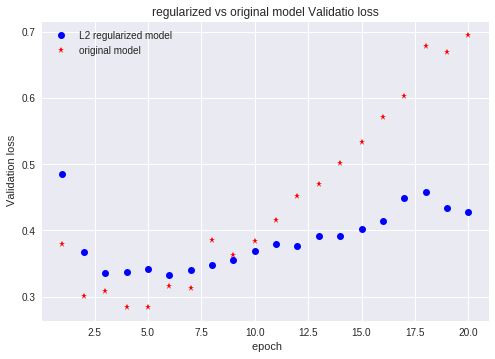

In [21]:
#@title Default title text
# original and regularized model
import matplotlib.pyplot as plt
hist_rg_dict_val_loss = hist_rg_dict["val_loss"]
hist_og_dict_val_loss = hist_og_dict["val_loss"]

epochs = range(1,len(hist_bg_dict_val_loss) + 1)

plt.plot(epochs, hist_rg_dict_val_loss,"bo", label= 'L2 regularized model')
plt.plot(epochs, hist_og_dict_val_loss, "r*", label= 'original model')
plt.title("regularized vs original model Validatio loss")
plt.ylabel(" Validation loss")
plt.xlabel(" epoch")
plt.legend()
plt.show()

**From the above we see that the regularized model is more resistant to overfitting than the original model. Also, rememeber that since the penalties are only added at training time  the loss of this network will be much higher at training than at test time**

**Different weight regularizers in keras**

In [0]:
from keras import layers
from keras import models
from keras import regularizers
def build_model_regularized_l1():
  model = models.Sequential()
  model.add(layers.Dense(16,
                        activation= 'relu',
                        kernel_regularizer = regularizers.l1(0.001), #l2(0.001 means that each weight coefficent adds to the loss a value, 
                        input_shape = (x_train.shape[1],)))                 #equal to 0.001 * weight_coefficient_value)
  model.add(layers.Dense(16,
                        kernel_regularizer=regularizers.l1(0.001),
                        activation = 'relu',
                        ))
  model.add(layers.Dense(1, activation='sigmoid'))
  
   #compilation
  model.compile(optimizer = 'rmsprop',
               loss = 'binary_crossentropy',
               metrics = ['accuracy'])
  
  history_rgu_l1 = model.fit(partial_x_train,
                         partial_y_train,
                         epochs = 20,
                         batch_size = 512,
                         validation_data = (x_val,y_val))
  return history_rgu_l1

In [0]:
from keras import layers
from keras import models
from keras import regularizers
def build_model_regularized_l1l2():
  model = models.Sequential()
  model.add(layers.Dense(16,
                        activation= 'relu',
                        kernel_regularizer = regularizers.l1_l2(0.001), #l2(0.001 means that each weight coefficent adds to the loss a value, 
                        input_shape = (x_train.shape[1],)))                 #equal to 0.001 * weight_coefficient_value)
  model.add(layers.Dense(16,
                        kernel_regularizer=regularizers.l1_l2(0.001),
                        activation = 'relu',
                        ))
  model.add(layers.Dense(1, activation='sigmoid'))
  
   #compilation
  model.compile(optimizer = 'rmsprop',
               loss = 'binary_crossentropy',
               metrics = ['accuracy'])
  
  history_rgu_l1l2 = model.fit(partial_x_train,
                         partial_y_train,
                         epochs = 20,
                         batch_size = 512,
                         validation_data = (x_val,y_val))
  return history_rgu_l1l2

In [28]:
hist_rgu_l1= build_model_regularized_l1()

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 119us/step - loss: 1.1061 - acc: 0.6305 - val_loss: 0.7914 - val_acc: 0.6118
Epoch 2/20
15000/15000 [==============================] - 1s 98us/step - loss: 0.7509 - acc: 0.7662 - val_loss: 0.7294 - val_acc: 0.7860
Epoch 3/20
15000/15000 [==============================] - 1s 96us/step - loss: 0.7013 - acc: 0.8163 - val_loss: 0.6841 - val_acc: 0.8196
Epoch 4/20
15000/15000 [==============================] - 1s 96us/step - loss: 0.6537 - acc: 0.8425 - val_loss: 0.6451 - val_acc: 0.8398
Epoch 5/20
15000/15000 [==============================] - 1s 96us/step - loss: 0.6183 - acc: 0.8501 - val_loss: 0.6131 - val_acc: 0.8523
Epoch 6/20
15000/15000 [==============================] - 1s 97us/step - loss: 0.5902 - acc: 0.8597 - val_loss: 0.5892 - val_acc: 0.8548
Epoch 7/20
15000/15000 [==============================] - 1s 96us/step - loss: 0.5769 - acc: 0.8579 - val_loss: 0.5881 - val_ac

In [29]:
hist_rgu_l1l2= build_model_regularized_l1l2()

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 131us/step - loss: 1.2980 - acc: 0.5928 - val_loss: 0.9143 - val_acc: 0.6093
Epoch 2/20
15000/15000 [==============================] - 1s 97us/step - loss: 0.8728 - acc: 0.7388 - val_loss: 0.8515 - val_acc: 0.7101
Epoch 3/20
15000/15000 [==============================] - 1s 95us/step - loss: 0.8091 - acc: 0.8030 - val_loss: 0.7887 - val_acc: 0.8383
Epoch 4/20
15000/15000 [==============================] - 1s 97us/step - loss: 0.7531 - acc: 0.8357 - val_loss: 0.7408 - val_acc: 0.8510
Epoch 5/20
15000/15000 [==============================] - 1s 96us/step - loss: 0.7006 - acc: 0.8459 - val_loss: 0.6868 - val_acc: 0.8440
Epoch 6/20
15000/15000 [==============================] - 1s 95us/step - loss: 0.6549 - acc: 0.8580 - val_loss: 0.6506 - val_acc: 0.8545
Epoch 7/20
15000/15000 [==============================] - 1s 96us/step - loss: 0.6263 - acc: 0.8609 - val_loss: 0.6358 - val_ac

In [0]:
hist_rg_l1l2_dict = hist_rgu_l1l2.history


In [0]:
hist_rg_l1_dict = hist_rgu_l1.history

In [36]:
hist_rg_l1_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

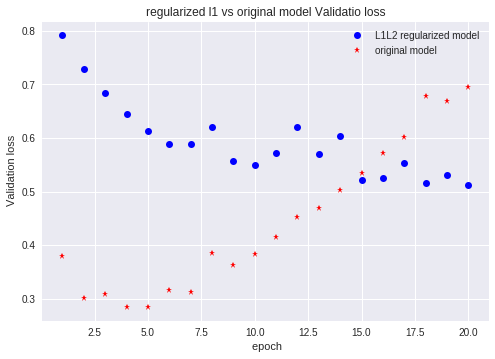

In [40]:

# original and regularized l1 model
import matplotlib.pyplot as plt
hist_rg_l1_dict_val_loss = hist_rg_l1_dict["val_loss"]
hist_og_dict_val_loss = hist_og_dict["val_loss"]

epochs = range(1,len(hist_rg_l1_dict_val_loss) + 1)

plt.plot(epochs, hist_rg_l1_dict_val_loss,"bo", label= 'L1L2 regularized model')
plt.plot(epochs, hist_og_dict_val_loss, "r*", label= 'original model')
plt.title("regularized l1 vs original model Validatio loss")
plt.ylabel(" Validation loss")
plt.xlabel(" epoch")
plt.legend()
plt.show()

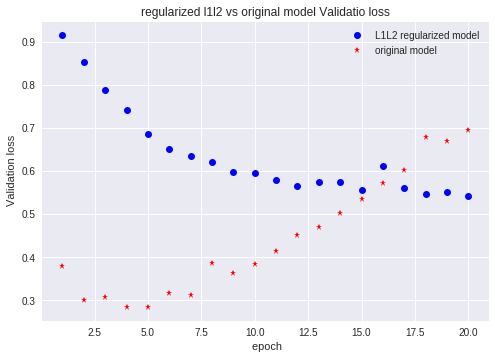

In [39]:

# original and regularized l1 l2 model
import matplotlib.pyplot as plt
hist_rg_l1l2_dict_val_loss = hist_rg_l1l2_dict["val_loss"]
hist_og_dict_val_loss = hist_og_dict["val_loss"]

epochs = range(1,len(hist_rg_l1l2_dict_val_loss) + 1)

plt.plot(epochs, hist_rg_l1l2_dict_val_loss,"bo", label= 'L1L2 regularized model')
plt.plot(epochs, hist_og_dict_val_loss, "r*", label= 'original model')
plt.title("regularized l1l2 vs original model Validatio loss")
plt.ylabel(" Validation loss")
plt.xlabel(" epoch")
plt.legend()
plt.show()

**Adding Dropout**